In [1]:
import tensorflow as tf

In [3]:
model = tf.keras.Sequential([
    tf.keras.layers.InputLayer(input_shape=(572,572,1)),
    
    tf.keras.layers.Conv2D(filters=64, kernel_size=3),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.Conv2D(filters=64, kernel_size=3),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.MaxPooling2D(),

    tf.keras.layers.Conv2D(filters=128, kernel_size=3),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.Conv2D(filters=128, kernel_size=3),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.MaxPooling2D(),

    tf.keras.layers.Conv2D(filters=256, kernel_size=3),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.Conv2D(filters=256, kernel_size=3),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.MaxPooling2D(),

    tf.keras.layers.Conv2D(filters=512, kernel_size=3),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.Conv2D(filters=512, kernel_size=3),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.MaxPooling2D(),

    tf.keras.layers.Conv2D(filters=512, kernel_size=3),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.Conv2D(filters=512, kernel_size=3),
    tf.keras.layers.Activation('relu'),

    tf.keras.layers.Conv2DTranspose(filters=1024, kernel_size=2, strides=2, padding='same'),
    tf.keras.layers.Conv2D(filters=512, kernel_size=3),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.Conv2D(filters=512, kernel_size=3),
    tf.keras.layers.Activation('relu'),

    tf.keras.layers.Conv2DTranspose(filters=512, kernel_size=2, strides=2, padding='same'),
    tf.keras.layers.Conv2D(filters=256, kernel_size=3),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.Conv2D(filters=256, kernel_size=3),
    tf.keras.layers.Activation('relu'),

    tf.keras.layers.Conv2DTranspose(filters=256, kernel_size=2, strides=2, padding='same'),
    tf.keras.layers.Conv2D(filters=198, kernel_size=3),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.Conv2D(filters=198, kernel_size=3),
    tf.keras.layers.Activation('relu'),

    tf.keras.layers.Conv2DTranspose(filters=128, kernel_size=2, strides=2, padding='same'),
    tf.keras.layers.Conv2D(filters=64, kernel_size=3),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.Conv2D(filters=64, kernel_size=3),
    tf.keras.layers.Activation('relu'),

    tf.keras.layers.Conv2D(filters=1, kernel_size=1, activation='sigmoid'),
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 570, 570, 64)      640       
                                                                 
 activation (Activation)     (None, 570, 570, 64)      0         
                                                                 
 conv2d_1 (Conv2D)           (None, 568, 568, 64)      36928     
                                                                 
 activation_1 (Activation)   (None, 568, 568, 64)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 284, 284, 64)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 282, 282, 128)     73856     
                                                        

In [2]:
def encoder_block(inputs, num_filters): 
  
    x = tf.keras.layers.Conv2D(num_filters,  
                               3,  
                               padding = 'valid')(inputs) 
    x = tf.keras.layers.Activation('relu')(x) 
      
    x = tf.keras.layers.Conv2D(num_filters,  
                               3,  
                               padding = 'valid')(x) 
    x = tf.keras.layers.Activation('relu')(x) 
  
    x = tf.keras.layers.MaxPool2D(pool_size = (2, 2), 
                                  strides = 2)(x) 
      
    return x

In [3]:
def decoder_block(inputs, skip_features, num_filters): 
  
    x = tf.keras.layers.Conv2DTranspose(num_filters, 
                                        (2, 2),  
                                        strides = 2,  
                                        padding = 'valid')(inputs) 
       
    skip_features = tf.image.resize(skip_features, 
                                    size = (x.shape[1], 
                                            x.shape[2])) 
    x = tf.keras.layers.Concatenate()([x, skip_features]) 
      
    x = tf.keras.layers.Conv2D(num_filters, 
                               3,  
                               padding = 'valid')(x) 
    x = tf.keras.layers.Activation('relu')(x) 
  
    x = tf.keras.layers.Conv2D(num_filters, 3, padding = 'valid')(x) 
    x = tf.keras.layers.Activation('relu')(x) 
      
    return x

In [4]:
def unet_model(input_shape = (256, 256, 3), num_classes = 1): 
    inputs = tf.keras.layers.Input(input_shape) 
      
    s1 = encoder_block(inputs, 64) 
    s2 = encoder_block(s1, 128) 
    s3 = encoder_block(s2, 256) 
    s4 = encoder_block(s3, 512) 
      
    b1 = tf.keras.layers.Conv2D(1024, 3, padding = 'valid')(s4) 
    b1 = tf.keras.layers.Activation('relu')(b1) 
    b1 = tf.keras.layers.Conv2D(1024, 3, padding = 'valid')(b1) 
    b1 = tf.keras.layers.Activation('relu')(b1) 
      
    s5 = decoder_block(b1, s4, 512) 
    s6 = decoder_block(s5, s3, 256) 
    s7 = decoder_block(s6, s2, 128) 
    s8 = decoder_block(s7, s1, 64) 
      
    outputs = tf.keras.layers.Conv2D(num_classes,  
                                     1,  
                                     padding = 'valid',  
                                     activation = 'sigmoid')(s8) 
      
    model = tf.keras.models.Model(inputs = inputs,  
                                  outputs = outputs,  
                                  name = 'U-Net') 
    return model 
  
if __name__ == '__main__': 
    model = unet_model(input_shape=(572, 572, 3), num_classes=2) 
    # model.summary()

(1, 572, 572, 3)
1/1 [==============================] - 0s 181ms/step


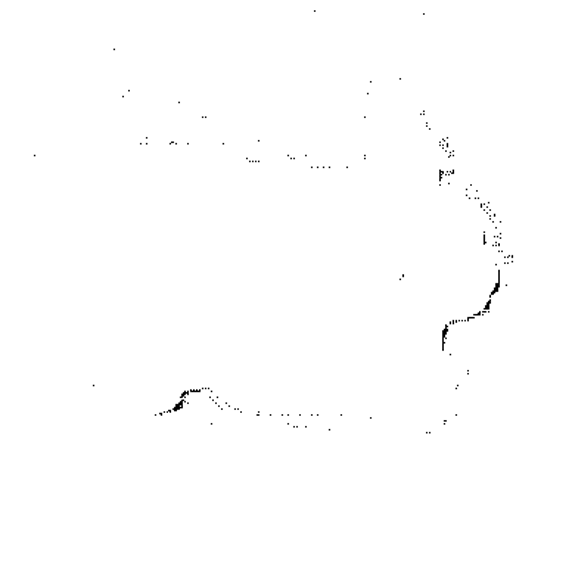

In [6]:
import numpy as np 
from PIL import Image 
from tensorflow.keras.preprocessing import image 
  
# Load the image 
img = Image.open('image.png') 
# Preprocess the image 
img = img.resize((572, 572)) 
img_array = image.img_to_array(img) 
img_array = np.expand_dims(img_array[:,:,:3], axis=0) 
print(img_array.shape)
img_array = img_array / 255.
  
# Load the model 
model = unet_model(input_shape=(572, 572, 3), num_classes=2) 
  
# Make predictions 
predictions = model.predict(img_array) 
  
# Convert predictions to a numpy array and resize to original image size 
predictions = np.squeeze(predictions, axis=0) 
predictions = np.argmax(predictions, axis=-1) 
predictions = Image.fromarray(np.uint8(predictions*255)) 
predictions = predictions.resize((img.width, img.height)) 
  
# Save the predicted image 
predictions.save('predicted_image.jpg') 
predictions